# Convolutionとは
日本語だと「畳み込み」や「合成積」と呼ばれます。
数学的には関数fと関数gの積の積分で表されますが、画像処理においては足し算と掛け算のみで表すことができます。
畳み込みによって画像に対して効果をかけたり画像から重要な特徴を得ることができます。

簡単な例をnumpyを使って示します。
numpyは数値計算用のライブラリです。
機能が多く詳しい説明はできないので、必要なところは説明しますが、説明がないところは各自で調べるかそういうものだと思って気にせず進めてください。

まず高さ4・幅4の行列fを作ります。ここではfは画像とみなしてください。
numpyで使われる行列はndarrayという独自のデータ構造を使います。

In [0]:
import numpy as np
np.random.seed(0)

In [2]:
f = np.random.randint(0, 255, 16).reshape(4, 4)
print(f)

[[172  47 117 192]
 [ 67 251 195 103]
 [  9 211  21 242]
 [ 36  87  70 216]]


続いてgはフィルタやカーネルと呼ばれるもので、これをfに畳み込むことで画像に対して様々な処理を表現できます。ここでは3×3のカーネルを考えます。

In [3]:
g = np.random.randint(-10, 10, 9).reshape(3, 3)
print(g)

[[ 2 -9 -4]
 [-3  4  7]
 [-5  3 -2]]


fに対してgを畳み込むには、まずfの左上からgと同じサイズの部分、すなわち0行目から2行目まで・0列目から2列目までを切り出します。  
ndarrayでもスライスの書き方は通常のリストと同じですが、行と列を同時にスライスすることができます。


In [4]:
f_crop = f[0:3, 0:3]
print(f_crop)

[[172  47 117]
 [ 67 251 195]
 [  9 211  21]]


次にこの切り出した部分とgを重ねて、重なった部分の値で掛け算し、最後にそれらすべてを足し合わせます。  
要素へのアクセスもndarrayでは行と列のインデックスを同時に指定することができます。

In [5]:
sum = 0
for row in [0, 1, 2]:
  for col in [0, 1, 2]:
    m = f_crop[row, col] * g[row, col]
    print(f'{f_crop[row, col]}×{g[row, col]}={m}\t', end='')
    sum += m
  print()
print(f'result:{sum}')

172×2=344	47×-9=-423	117×-4=-468	
67×-3=-201	251×4=1004	195×7=1365	
9×-5=-45	211×3=633	21×-2=-42	
result:2167


numpyを使えば以下のようにして同じ計算ができます。*演算子で同じサイズのndarrayに対して同じインデックの要素を掛け算した行列を計算でき、sum関数でndarrayの要素すべてを足し合わせた結果を得ることができます。

In [6]:
mul = f_crop * g
print(mul)
sum = np.sum(mul)
print(f'result:{sum}')

[[ 344 -423 -468]
 [-201 1004 1365]
 [ -45  633  -42]]
result:2167


このgを重ねて掛けて足し合わせる処理を、fの切り出すところをずらしてf全体にかけるのが畳み込みです。すなわちfに対してgを畳み込んだ結果は以下のようになります。今回fは4×4だったので右と下にそれぞれ一回ずつずらすことができます。

In [7]:
f_conv_g = np.array([[np.sum(f[0:3, 0:3] * g), np.sum(f[0:3, 1:4] * g)],
                     [np.sum(f[1:4, 0:3] * g), np.sum(f[1:4, 1:4] * g)]])
print(f_conv_g)

[[ 2167 -2455]
 [-2000 -1177]]


入力サイズが変わっても同じように計算します。

In [8]:
h = np.random.randint(0, 255, 30).reshape(5, 6)
print(h)
print("\n--Convolution--")
h_conv_g = np.array([[np.sum(h[0:3, 0:3] * g), np.sum(h[0:3, 1:4] * g), np.sum(h[0:3, 2:5] * g), np.sum(h[0:3, 3:6] * g)],
                     [np.sum(h[1:4, 0:3] * g), np.sum(h[1:4, 1:4] * g), np.sum(h[1:4, 2:5] * g), np.sum(h[1:4, 3:6] * g)],
                     [np.sum(h[2:5, 0:3] * g), np.sum(h[2:5, 1:4] * g), np.sum(h[2:5, 2:5] * g), np.sum(h[2:5, 3:6] * g)]])
print(h_conv_g)

[[  9 148 115 208 243 197]
 [254  79 175 192  82  99]
 [216 177 243  29 147 147]
 [142 167  32 193   9 185]
 [127  32  31 202 244 151]]

--Convolution--
[[-2030    22 -3219 -2112]
 [  585 -2666  -889  -528]
 [-2268 -1442   339 -1681]]


後で使いやすいように3×3のカーネルを畳み込む処理を関数で実装しておきましょう。

ヒント:  
+ fの高さ・幅は以下のようにして取得できます。
```
height, widht = f.shape
```
+ fに3×3のカーネルを畳み込むと、出力結果の高さと幅はfの高さと幅よりそれぞれ2ずつ小さくなります。
+ 高さ５, 幅4ですべての要素が0のndarrayは以下のようにして作ることができます。
```
z = np.zeros((5, 4))
```

In [0]:
def np_conv3x3(image, kernel):
  """
  引数
    image: 二次元のndarray(サイズは縦横それぞれ3以上)
    kernel: 3 * 3のndarray
  出力
    fをgに畳み込んだ結果のndarray 
  """
  pass

In [10]:
inputs = [f, h]
results = [f_conv_g, h_conv_g]
for input, result in zip(inputs, results):
  if np.all(result == np_conv3x3(input, g)):
    print('[OK]')
  else:
    print('[NG]')

[NG]
[NG]


実装例

↓

↓

↓

↓

↓

↓

↓

↓

↓

↓

In [0]:
import itertools
def np_conv3x3(image, kernel):
  img_h, img_w = image.shape
  result_arr = np.zeros((img_h, img_w))
  for row, col in itertools.product(range(1, img_h - 1), range(1, img_w - 1)):
    result_arr[row, col] = np.sum(image[row - 1: row + 2, col - 1: col + 2] * kernel)
  return result_arr[1:img_h-1, 1:img_w-1]

In [12]:
inputs = [f, h]
results = [f_conv_g, h_conv_g]
for input, result in zip(inputs, results):
  if np.all(result == np_conv3x3(input, g)):
    print('[OK]')
  else:
    print('[NG]')

[OK]
[OK]


# Convolutionを使った画像処理
カーネルの値を変えることで、画像に対して様々な処理をすることができます。

## 画像の準備
wikipediaから適当な画像を落としてきて使います。画像を扱うためにPillow(PIL)というライブラリを使用しています。

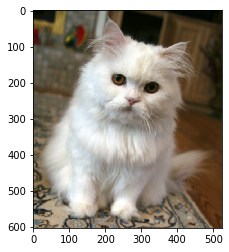

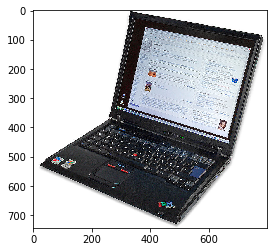

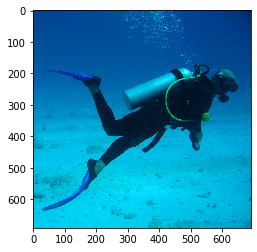

In [13]:
import io
import urllib.request
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

def load_img(img_url):
  # Webから画像をバイナリで読み込み
  with urllib.request.urlopen(img_url) as response:
    bin = io.BytesIO(response.read())
  # 画像形式で読み込み
  pil_img = Image.open(bin)
  return pil_img

img_urls = ['https://upload.wikimedia.org/wikipedia/commons/1/15/White_Persian_Cat.jpg',
            'https://upload.wikimedia.org/wikipedia/commons/thumb/0/0e/IBM_Thinkpad_R51.jpg/800px-IBM_Thinkpad_R51.jpg',
            'https://upload.wikimedia.org/wikipedia/commons/9/94/Buzo.jpg']
pil_imgs = [load_img(img_url) for img_url in img_urls]

# 画像を表示
for pil_img in pil_imgs:
    plt.imshow(np.array(pil_img))
    plt.show()

わかりやすいようにグレースケールの画像を扱います。

画像のデータ型はuint8の二次元配列になります。そのため、画素値は0から255の整数値をとります。

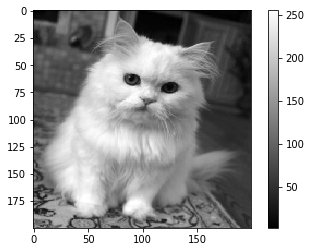

In [14]:
def show_gray_img(gray_img):
  # グレースケール画像の表示
  plt.imshow(np.array(gray_img), cmap='gray')
  plt.colorbar()
  plt.show()
  
# 一枚目の画像をグレースケールに変換
gray_img = pil_imgs[0].convert('L')
# 200x200にリサイズ
gray_img = gray_img.resize((200, 200))

show_gray_img(gray_img)

## 平滑化

### 平均値フィルタ

In [15]:
avg_filter = np.array([[1.0/9.0, 1.0/9.0, 1.0/9.0]] * 3)
print(avg_filter)

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


まわりのピクセルの平均値を計算するフィルタです。今回はカーネルサイズが3x3なので、フィルタのすべての値が1/9になります。

このフィルタをかけることで画像をぼかすことができ、ノイズの除去などに利用できます。

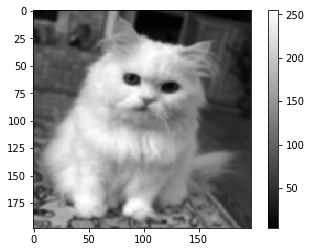

In [16]:
# 平均値フィルタ (np.asarrayでPIL形式の画像をndarrrayに変換できます)
show_gray_img(np_conv3x3(np.asarray(gray_img), avg_filter))

### ガウシアンフィルタ

画像をぼかすときにはガウシアンフィルタもよく使われます。ガウス分布をもとに中心ほど重みを大きく周辺ほど重みを小さくしたフィルタです。

[[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]]


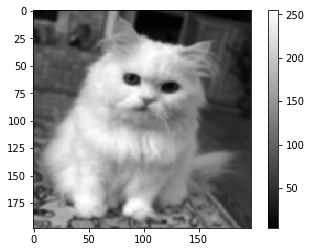

In [17]:
gaussian_filter = np.array([[1/16, 2/16, 1/16], [2/16, 4/16, 2/16], [1/16, 2/16, 1/16]])
print(gaussian_filter)
show_gray_img(np_conv3x3(np.asarray(gray_img), avg_filter))

### メディアンフィルタ

平均をとるとピーク(まわりより極端に大きい・小さい値)の影響を受けやすく、エッジもボケてしまいます。
そのためノイズ除去にはメディアンフィルタも使われます。
数式で書くのは難しいですが、フィルタ内の中央値をとるフィルタです。
これによりエッジの情報を残したままピークを除去することができます。

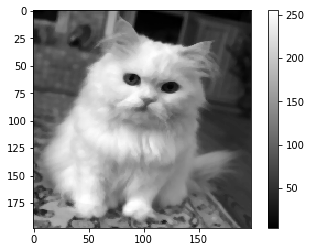

In [18]:
def median_filter_3x3(image):
  img_h, img_w = image.shape
  result_arr = np.zeros((img_h, img_w))
  for row, col in itertools.product(range(1, img_h - 1), range(1, img_w - 1)):
    result_arr[row, col] = np.median(image[row - 1: row + 2, col - 1: col + 2])
  return result_arr[1:img_h-1, 1:img_w-1]

show_gray_img(median_filter_3x3(np.asarray(gray_img)))

## エッジ検出

### 微分フィルタ

In [19]:
differential_filter_x = np.array([[0, 0, 0], [0, -1, 1], [0, 0, 0]]).astype(float)
print(differential_filter_x)

[[ 0.  0.  0.]
 [ 0. -1.  1.]
 [ 0.  0.  0.]]


かなり雑な説明になりますが、微分とは局所的な変化の度合いを求める操作です。
画像は連続値ではなく離散値なので、近傍のピクセルで差をとるのが微分にあたります。
上のフィルタでは右の画素値と中央の画素値の差をとっており、x軸方向の微分になっています。

この操作により画素値の変化の大きいところ、つまりエッジを検出することができます。

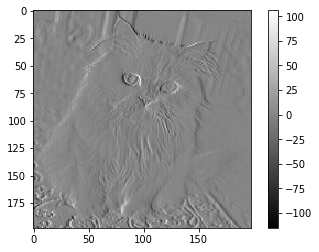

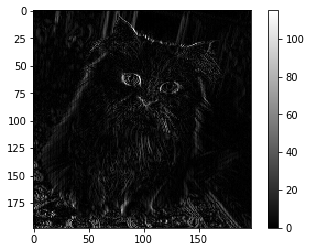

In [20]:
# 方向込 (画素値が右>左なら+、左>右なら-になる)
show_gray_img(np_conv3x3(np.asarray(gray_img), differential_filter_x))
# 絶対値 (np.absで絶対値に変換できます)
show_gray_img(np.abs(np_conv3x3(np.asarray(gray_img), differential_filter_x)))

y軸方向の微分も同じようにできます。

[[ 0.  0.  0.]
 [ 0. -1.  0.]
 [ 0.  1.  0.]]


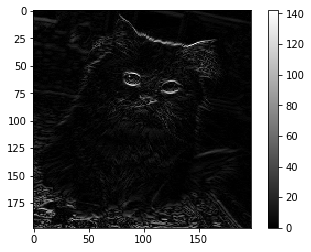

In [21]:
differential_filter_y = np.array([[0, 0, 0], [0, -1, 0], [0, 1, 0]]).astype(float)
print(differential_filter_y)
show_gray_img(np.abs(np_conv3x3(np.asarray(gray_img), differential_filter_y)))

## ソーベルフィルタ

エッジ検出には微分フィルタをもとに改良が行われてきました。その中でよく使われるのがソーベルフィルタです。微分フィルタに重み付きの平滑化フィルタを組み合わせています。

[[-1.  0.  1.]
 [-2.  0.  2.]
 [-1.  0.  1.]]


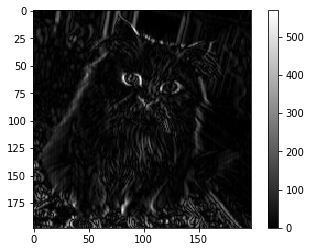

In [22]:
# 縦方向のエッジを検出
sobel_filter_v = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]).astype(float)
print(sobel_filter_v)
edge_v = np.abs(np_conv3x3(np.asarray(gray_img), sobel_filter_v))
show_gray_img(edge_v)

[[-1. -2. -1.]
 [ 0.  0.  0.]
 [ 1.  2.  1.]]


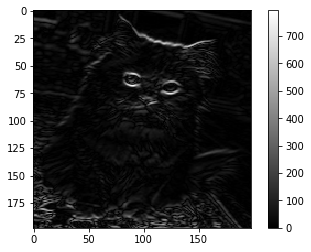

In [23]:
# 横方向のエッジを検出
sobel_filter_h = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]).astype(float)
print(sobel_filter_h)
edge_h = np.abs(np_conv3x3(np.asarray(gray_img), sobel_filter_h))
show_gray_img(edge_h)

この２つの二乗和平方根をとると、画像全体のエッジ画像になります。

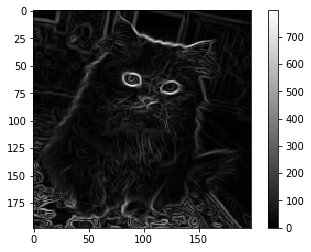

In [24]:
# np.sqrtで平方根を計算できます
show_gray_img(np.sqrt(edge_v ** 2 + edge_h ** 2))

### ラプラシアンフィルタ

ソーベルフィルタは1次微分を元にしていましたが、2次微分を元にしているのがラプラシアンフィルタです（導出が気になる人は後述の付録を参考にしてください）。

[[ 0.  1.  0.]
 [ 1. -4.  1.]
 [ 0.  1.  0.]]


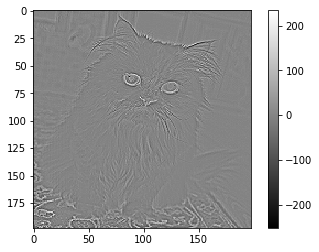

In [25]:
laplacian_filter = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]]).astype(float)
print(laplacian_filter)
laplacian = np_conv3x3(np.asarray(gray_img), laplacian_filter)
show_gray_img(laplacian)

ラプラシアンフィルタはエッジのエッジを検出していることになります。
つまりエッジの隣の画素の強調します。
場合によってはこれ自体をエッジの特徴としてつかうことができます。

また、ラプラシアンフィルタの結果を元の画像から引くことで、エッジとエッジの隣の画素値の差がより大きくなります。
これがいわゆる鮮鋭化(シャープネス)という処理です。

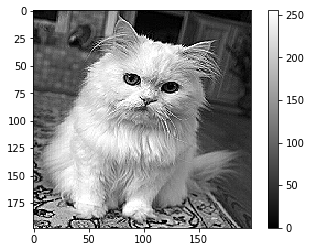

In [26]:
# np.clipで値が0より小さいときは0、255より大きいときは255にする
show_gray_img(np.clip(np.asarray(gray_img)[1:-1, 1:-1] - laplacian, 0, 255))

#### 付録: ラプラシアンフィルタの導出
画像Iに対してx軸方向の１次微分I_x、y軸方向の1次微分I_yは
+ I_x(x, y) = I_x(x+1, y) - I(x, y)
+ I_y(x, y) = I_y(x, y+1) - I(x, y)

2次微分は
+ I_xx(x, y) = I_x(x, y) - I_x(x - 1, y) = {I(x + 1, y) - I(x, y)} - {I(x, y) - I(x - 1, y)} = I(x + 1, y) - 2I(x, y) + I(x - 1, y)
+ I_yy(x, y) = I_y(x, y) - I_y(x, y - 1) = {I(x, y + 1) - I(x, y)} - {I(x, y) - I(x, y - 1)} = I(x, y + 1) - 2I(x, y) + I(x, y - 1)

すなわちラプラシアン∇^2Iは
+ ∇^2I(x, y) = I_xx(x, y) + I_yy(x, y) = I(x + 1, y) + I(x - 1, y) + I(x, y + 1) + I(x, y - 1)- 4I(x, y)

In [27]:
I = np.asarray(gray_img)
I_x = np_conv3x3(I, differential_filter_x)  # different_filter_xは1行2列-1行1列なのでI_x[0,0]=I[1,2]-I[1,1]
I_xx = np_conv3x3(I_x, differential_filter_x)  # I_xx[0,0]=I_x[1,2]-I_x[1,1]=(I[2,4]]-I[2,3])-(I[2,3]-I[2,2]) つまり元画像(x=3,y=2)の二次微分  
I_y = np_conv3x3(I, differential_filter_y) # different_filter_yは2行1列-1行1列なのでI_x[0,0]=I[2,1]-I[1,1]
I_yy = np_conv3x3(I_y, differential_filter_y)  # I_yy[0,0]=I_y[2,1]-I_y[1,1]=(I[4,2]-I[3,2])-(I[3,2]-I[2,2]) つまり元画像(x=2,y=3)の二次微分

# laplacian filterの結果と答えが一致する
print(np.all(laplacian[2:-1, 2:-1] == (I_xx[1:, :-1] + I_yy[:-1, 1:]))) # 座標が合うところだけ計算

True


# Convolutional Neural Network: CNN

Convolutionによって画像をぼかしたりエッジを検出できることを見てきました。
他にも、カーネルの値を工夫すれば画像から重要な特徴を得ることができます。
そのことを利用してニューラルネットワーク(NN)においてもConvolutionが使われています。
Convolutionを組み込んだNNをCNNと呼びます。

紹介のために、深層学習のフレームワークであるPyTorchを使います。
PyTorchの実装について詳しく説明するのは難しいので、今回は割愛します。

In [0]:
# PyTorchおよび画像処理用ライブラリtorchvisionのimport
import torch
import torchvision

## Conv2d

PyTorchにも2次元配列のConvolutionを計算するConv2dというクラスが用意されています。
これは上で説明してきたConvolutionと全く同じ演算をします。

PyTorchではndarrayの代わりに独自のTensorクラスを使うので、torch.from_numpyで画像やカーネルの値をTensorクラスに変換しています。


In [0]:
def torch_conv3x3(gray_img, kernel):
  conv2d = torch.nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, bias=False)  # gray-scale 3x3のConvolution
  conv2d.weight.requires_grad = False  # 勾配の計算をしない(勾配は学習時のみ使う)
  conv2d.weight.data = torch.from_numpy(kernel).view((1, 1, 3, 3)).float()  # ndarrayからカーネルの値をセット

  gray_tensor = torch.from_numpy(np.asarray(gray_img)[None, None, ...]).float() # 画像をTensorクラスに変換
  result = conv2d(gray_tensor) # Convolutionを計算
  result = result.cpu().numpy()[0, 0]  # Tensorクラスからndarrayに変換
  return result

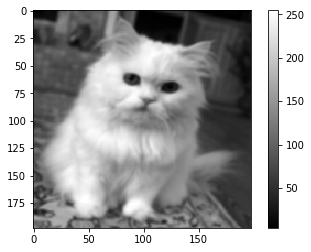

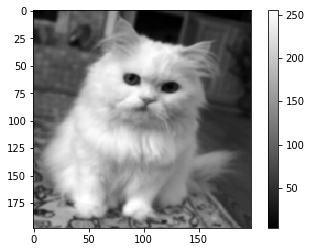

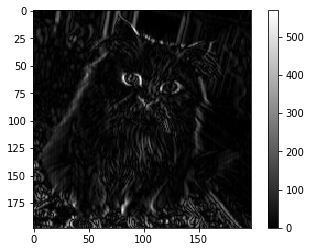

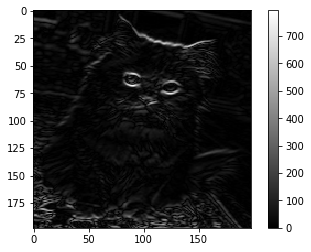

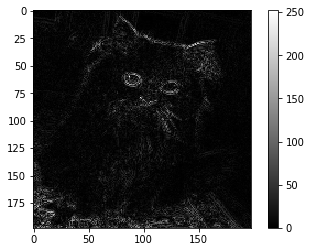

In [30]:
# numpyで実装したものと同じ結果になる
for kernel in [avg_filter, gaussian_filter, sobel_filter_v, sobel_filter_h, laplacian_filter]:
  result = torch_conv3x3(gray_img, kernel)
  show_gray_img(np.abs(result))

## CNNによる画像分類

ほとんどConvolutionを使うだけで画像分類を行ったNNがあります。
VGG-16と呼ばれており、3x3のConvolutionを13回と線形演算を3回するモデルです。

ImageNetという1,000クラスの画像分類を行うデータセットで学習済みのモデルを使って中身を見てみます。

参考:
+ [VGG-16 元論文](https://arxiv.org/pdf/1409.1556.pdf)
+ [pytorch/examples/imagenet](https://github.com/pytorch/examples/blob/97304e232807082c2e7b54c597615dc0ad8f6173/imagenet/main.py)


torchvisionを使えばVGG-16を自動でダウンロードして使うことができます。

In [31]:
model = torchvision.models.vgg16(pretrained=True)
print(model)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/checkpoints/vgg16-397923af.pth



VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=

PyTorchのモデルをprintすると中の構造が表示されます。活性化関数ReLUやMax Pooling・Average Poolingといった処理も入っていますが、メインの計算は3x3のConv2dを繰り返しているだけということがわかるかと思います。

画像をぼかしたりエッジを検出するフィルタを見てきましたが、画像を分類するフィルタというのはどういうものでしょうか。

実際に一番最初のConvolutionのカーネルの値を見てみます。
今までは3x3のフィルタ・入力がグレースケール1チャンネル・出力がグレースケール1チャンネルだったのでカーネルのサイズは1x1x3x3でした。
VGG-16のひとつめのConvolutionは3x3のフィルタ・入力がRGBの3チャンネルで出力の特徴量の次元を64に設定しているので、カーネルのサイズは64x3x3x3になります。


In [32]:
first_kernel = model.features[0].weight.data
print("Size: ", first_kernel.size())
print(first_kernel)

Size:  torch.Size([64, 3, 3, 3])
tensor([[[[-5.5373e-01,  1.4270e-01,  5.2896e-01],
          [-5.8312e-01,  3.5655e-01,  7.6566e-01],
          [-6.9022e-01, -4.8019e-02,  4.8409e-01]],

         [[ 1.7548e-01,  9.8630e-03, -8.1413e-02],
          [ 4.4089e-02, -7.0323e-02, -2.6035e-01],
          [ 1.3239e-01, -1.7279e-01, -1.3226e-01]],

         [[ 3.1303e-01, -1.6591e-01, -4.2752e-01],
          [ 4.7519e-01, -8.2677e-02, -4.8700e-01],
          [ 6.3203e-01,  1.9308e-02, -2.7753e-01]]],


        [[[ 2.3254e-01,  1.2666e-01,  1.8605e-01],
          [-4.2805e-01, -2.4349e-01,  2.4628e-01],
          [-2.5066e-01,  1.4177e-01, -5.4864e-03]],

         [[-1.4076e-01, -2.1903e-01,  1.5041e-01],
          [-8.4127e-01, -3.5176e-01,  5.6398e-01],
          [-2.4194e-01,  5.1928e-01,  5.3915e-01]],

         [[-3.1432e-01, -3.7048e-01, -1.3094e-01],
          [-4.7144e-01, -1.5503e-01,  3.4589e-01],
          [ 5.4384e-02,  5.8683e-01,  4.9580e-01]]],


        [[[ 1.7715e-01,  5.2149e-

というわけでこれが1,000クラスの画像分類をするConvolutionのひとつのカーネルの値になります。人手でこれを考えるのはものすごく大変と思われるので、大量の学習データを使って機械学習で求めています。

残りの部分はPyTorchでVGG-16を使って画像分類をするサンプルになります。
詳しくは説明しませんが、最終結果を見ればなんとなくできてそうなことがわかるかと思います。

In [0]:
# 画像の準備
import torchvision.transforms as T
def pil2tensor(pil_img):
  """
  PIL形式の画像をTensorに変換
    224x224にリサイズ
    学習データ(ImageNet)の画素値の平均・分散で正規化
  """
  transform = T.Compose([T.Resize((224, 224)), T.ToTensor(), T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])
  input_tensor = transform(pil_img)
  return input_tensor

input_tensors = [pil2tensor(pil_img) for pil_img in pil_imgs]
input_tensors = torch.stack(input_tensors)  

In [34]:
# 結果の計算
model.eval()  # モデルを推論用のモードに変更
with torch.no_grad():  # 学習しないので勾配の計算はしない
  results = model(input_tensors)
print('Result:', results.size())  # 画像3枚に対して1,000クラスそれぞれのスコア

Result: torch.Size([3, 1000])


In [0]:
# クラスを表す数字からクラスの名前にマッピングする用の辞書のダウンロード
import urllib.request
url = 'https://gist.githubusercontent.com/yrevar/942d3a0ac09ec9e5eb3a/raw/238f720ff059c1f82f368259d1ca4ffa5dd8f9f5/imagenet1000_clsidx_to_labels.txt'
with urllib.request.urlopen(url) as res:
  labels = eval(res.read())  # key: クラス番号 value: クラスの名前 の辞書

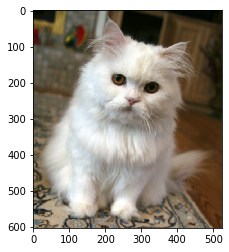

CLASS:Persian cat	PROB:98.9%
CLASS:Angora, Angora rabbit	PROB:0.6%
CLASS:Pekinese, Pekingese, Peke	PROB:0.2%
CLASS:lynx, catamount	PROB:0.1%
CLASS:Japanese spaniel	PROB:0.0%
---


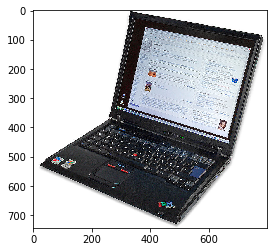

CLASS:notebook, notebook computer	PROB:43.6%
CLASS:hand-held computer, hand-held microcomputer	PROB:17.9%
CLASS:laptop, laptop computer	PROB:12.9%
CLASS:space bar	PROB:10.3%
CLASS:modem	PROB:2.7%
---


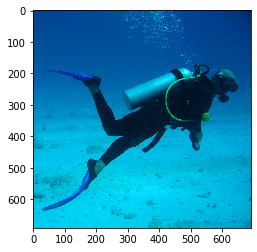

CLASS:scuba diver	PROB:97.9%
CLASS:snorkel	PROB:0.7%
CLASS:electric ray, crampfish, numbfish, torpedo	PROB:0.5%
CLASS:coral reef	PROB:0.3%
CLASS:tiger shark, Galeocerdo cuvieri	PROB:0.2%
---


In [36]:
for idx, result in enumerate(results):
  # 画像の表示
  plt.imshow(np.array(pil_imgs[idx]))
  plt.show()

  result = torch.nn.functional.softmax(result, dim=0)  # Softmax関数でスコアを確率の形式に
  result_arr = result.cpu().numpy()
  top5 = np.argsort(result_arr)[::-1][:5]  # 上位5件のクラス番号
  for idx in top5:
    print('CLASS:{}\tPROB:{:.1f}%'.format(labels[idx], result_arr[idx] * 100))  # クラスと確率の表示
  print('---')